# IMPORT LIBRARY

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from scipy.signal import find_peaks

# DATA CLEANING

## Data importing

In [2]:
df = pd.concat([
    pd.read_csv('../dataset/uwb_dataset_part1.csv'),
    pd.read_csv('../dataset/uwb_dataset_part2.csv'),
    pd.read_csv('../dataset/uwb_dataset_part3.csv'),
    pd.read_csv('../dataset/uwb_dataset_part4.csv'),
    pd.read_csv('../dataset/uwb_dataset_part5.csv'),
    pd.read_csv('../dataset/uwb_dataset_part6.csv'),
    pd.read_csv('../dataset/uwb_dataset_part7.csv')
], ignore_index=True)

## DATA UNDERSTANDING 

In [3]:
df.head()          # First 5 rows


,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
0,0.0,3.90,745.0,18712.0,10250.0,11576.0,64.0,11855.0,967.0,611.0,...,279.0,458.0,183.0,158.0,198.0,87.0,296.0,505.0,307.0,0.0
1,0.0,0.66,749.0,11239.0,6313.0,4712.0,64.0,18968.0,1133.0,447.0,...,144.0,334.0,290.0,228.0,187.0,213.0,202.0,89.0,103.0,0.0
2,1.0,7.86,746.0,4355.0,5240.0,3478.0,60.0,14699.0,894.0,723.0,...,32.0,373.0,224.0,174.0,124.0,329.0,207.0,96.0,218.0,0.0
3,1.0,3.48,750.0,8502.0,8416.0,5890.0,76.0,8748.0,1127.0,1024.0,...,252.0,173.0,198.0,160.0,434.0,397.0,290.0,155.0,342.0,256.0
4,0.0,1.19,746.0,17845.0,18095.0,12058.0,68.0,11380.0,1744.0,276.0,...,154.0,209.0,242.0,296.0,87.0,178.0,314.0,247.0,292.0,256.0


In [4]:
df.tail() #bottom 5 record

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
41995,0.0,2.43,745.0,12960.0,17703.0,14948.0,96.0,9987.0,2379.0,276.0,...,180.0,156.0,322.0,378.0,115.0,296.0,452.0,138.0,123.0,0.0
41996,0.0,1.39,745.0,2235.0,15089.0,8796.0,76.0,12559.0,1810.0,281.0,...,43.0,433.0,517.0,518.0,287.0,169.0,437.0,59.0,296.0,0.0
41997,1.0,5.48,747.0,7115.0,6262.0,4584.0,72.0,1435.0,1092.0,1024.0,...,394.0,475.0,262.0,468.0,247.0,192.0,395.0,335.0,284.0,256.0
41998,1.0,3.40,745.0,6662.0,7683.0,5600.0,72.0,1491.0,1077.0,1024.0,...,397.0,170.0,231.0,231.0,202.0,253.0,128.0,311.0,290.0,0.0
41999,0.0,2.43,747.0,2621.0,10276.0,6284.0,56.0,9116.0,1224.0,342.0,...,121.0,200.0,263.0,166.0,234.0,76.0,150.0,241.0,252.0,256.0


In [5]:
print(df.shape) #(rows, columns)


(42000, 1031)


In [6]:
print(df.columns.tolist()) # list all columns

['NLOS', 'RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR', 'CIR0', 'CIR1', 'CIR2', 'CIR3', 'CIR4', 'CIR5', 'CIR6', 'CIR7', 'CIR8', 'CIR9', 'CIR10', 'CIR11', 'CIR12', 'CIR13', 'CIR14', 'CIR15', 'CIR16', 'CIR17', 'CIR18', 'CIR19', 'CIR20', 'CIR21', 'CIR22', 'CIR23', 'CIR24', 'CIR25', 'CIR26', 'CIR27', 'CIR28', 'CIR29', 'CIR30', 'CIR31', 'CIR32', 'CIR33', 'CIR34', 'CIR35', 'CIR36', 'CIR37', 'CIR38', 'CIR39', 'CIR40', 'CIR41', 'CIR42', 'CIR43', 'CIR44', 'CIR45', 'CIR46', 'CIR47', 'CIR48', 'CIR49', 'CIR50', 'CIR51', 'CIR52', 'CIR53', 'CIR54', 'CIR55', 'CIR56', 'CIR57', 'CIR58', 'CIR59', 'CIR60', 'CIR61', 'CIR62', 'CIR63', 'CIR64', 'CIR65', 'CIR66', 'CIR67', 'CIR68', 'CIR69', 'CIR70', 'CIR71', 'CIR72', 'CIR73', 'CIR74', 'CIR75', 'CIR76', 'CIR77', 'CIR78', 'CIR79', 'CIR80', 'CIR81', 'CIR82', 'CIR83', 'CIR84', 'CIR85', 'CIR86', 'CIR87', 'CIR88', 'CIR89', 'CIR90', 'CIR91', 'CIR92', 'CIR93', 'CI

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 1031 entries, NLOS to CIR1015
dtypes: float64(1031)
memory usage: 330.4 MB


In [8]:
df.describe()      # Summary statistics

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
count,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,0.500000,3.831519,745.654167,8127.521905,11425.259524,9738.106048,72.284571,9789.690214,1316.096524,616.27250,...,257.455357,267.230833,249.123929,225.917143,239.445476,240.034286,254.388095,243.190643,253.173595,90.203429
std,0.500006,2.355976,4.505024,5393.330697,6235.434769,5352.311549,29.318995,4912.556005,582.434989,306.78537,...,148.613220,155.703171,132.054825,113.041790,131.519415,133.820366,177.274537,135.598470,145.780909,145.839730
min,0.000000,0.000000,707.000000,7.000000,63.000000,187.000000,28.000000,0.000000,310.000000,128.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
25%,0.000000,1.810000,744.000000,3573.750000,5322.750000,4723.000000,56.000000,6727.000000,961.000000,318.00000,...,161.000000,161.000000,161.000000,150.000000,154.000000,154.000000,155.000000,154.000000,158.000000,0.000000
50%,0.500000,3.480000,746.000000,7140.000000,12318.000000,10262.000000,68.000000,9950.500000,1134.000000,513.00000,...,233.000000,243.000000,233.000000,217.000000,225.000000,227.000000,229.000000,223.000000,230.000000,0.000000
75%,1.000000,5.420000,748.000000,12273.000000,17310.000000,14256.000000,80.000000,12443.000000,1488.000000,1024.00000,...,313.000000,338.000000,304.000000,275.000000,288.000000,292.000000,297.000000,295.000000,308.000000,256.000000
max,1.000000,28.020000,848.000000,20572.000000,20624.000000,20577.000000,324.000000,37208.000000,5169.000000,1056.00000,...,1593.000000,1497.000000,1172.000000,1169.000000,1315.000000,1595.000000,2153.000000,1428.000000,1709.000000,1280.000000


In [9]:
df['NLOS'].value_counts()

NLOS
0.0    21000
1.0    21000
Name: count, dtype: int64

In [10]:
df.dtypes #Column data types


NLOS       float64
RANGE      float64
FP_IDX     float64
FP_AMP1    float64
FP_AMP2    float64
            ...   
CIR1011    float64
CIR1012    float64
CIR1013    float64
CIR1014    float64
CIR1015    float64
Length: 1031, dtype: object

In [11]:
 #Check for total missing values in dataset
print(df.isnull().sum().sum())

0


In [12]:
# find duplicate rows
print(df.duplicated().sum())

0


In [13]:
# Check for infinite values
print(np.isinf(df.select_dtypes(include=[np.number])).sum().sum())

0


In [14]:
# Stats on the 14 features (NO CIR), checks if there are any negative values

feature_cols = ['RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR']
print(df[feature_cols].describe())

              RANGE        FP_IDX       FP_AMP1       FP_AMP2       FP_AMP3  \
count  42000.000000  42000.000000  42000.000000  42000.000000  42000.000000   
mean       3.831519    745.654167   8127.521905  11425.259524   9738.106048   
std        2.355976      4.505024   5393.330697   6235.434769   5352.311549   
min        0.000000    707.000000      7.000000     63.000000    187.000000   
25%        1.810000    744.000000   3573.750000   5322.750000   4723.000000   
50%        3.480000    746.000000   7140.000000  12318.000000  10262.000000   
75%        5.420000    748.000000  12273.000000  17310.000000  14256.000000   
max       28.020000    848.000000  20572.000000  20624.000000  20577.000000   

        STDEV_NOISE       CIR_PWR     MAX_NOISE       RXPACC       CH  \
count  42000.000000  42000.000000  42000.000000  42000.00000  42000.0   
mean      72.284571   9789.690214   1316.096524    616.27250      2.0   
std       29.318995   4912.556005    582.434989    306.78537      0.0

Range has max of 28.02, but 75% of data is below 5.42 (outlier), FP_IDX has max of 848 vs mean of 745 with 75% of data between 707 - 748

In [15]:
print("Unique values per feature column:")
for col in feature_cols:
    print(f"  {col}: {df[col].nunique()} unique values")

Unique values per feature column:
  RANGE: 1160 unique values
  FP_IDX: 76 unique values
  FP_AMP1: 16693 unique values
  FP_AMP2: 16533 unique values
  FP_AMP3: 16614 unique values
  STDEV_NOISE: 75 unique values
  CIR_PWR: 16591 unique values
  MAX_NOISE: 3056 unique values
  RXPACC: 725 unique values
  CH: 1 unique values
  FRAME_LEN: 3 unique values
  PREAM_LEN: 2 unique values
  BITRATE: 1 unique values
  PRFR: 1 unique values


### CH (always 2), BITRATE (always 110), PRFR (always 64) HAS 0 VARIANCE, CARRY NO INFO, CAN DROP

In [16]:
cir_cols = [col for col in df.columns if col.startswith('CIR')]
print((df[cir_cols].std() == 0).sum())

# how many CIR columns have 0 s.d. Since column with no variance will contribute nothing to distinguish LOS from NLOS

0


In [17]:
print(df.groupby('NLOS')[feature_cols].mean().T)

# mean for each feature based on NLOS label, larger mean difference = more important feature

NLOS                  0.0          1.0
RANGE            2.755215     4.907823
FP_IDX         747.082143   744.226190
FP_AMP1      10539.815381  5715.228429
FP_AMP2      14698.228810  8152.290238
FP_AMP3      12490.976238  6985.235857
STDEV_NOISE     67.819619    76.749524
CIR_PWR      11716.876810  7862.503619
MAX_NOISE     1431.532714  1200.660333
RXPACC         392.110143   840.434857
CH               2.000000     2.000000
FRAME_LEN       33.597714    34.005810
PREAM_LEN     1024.633905  1061.327238
BITRATE        110.000000   110.000000
PRFR            64.000000    64.000000


### For Visualise LOS vs NLOS feature distributions only

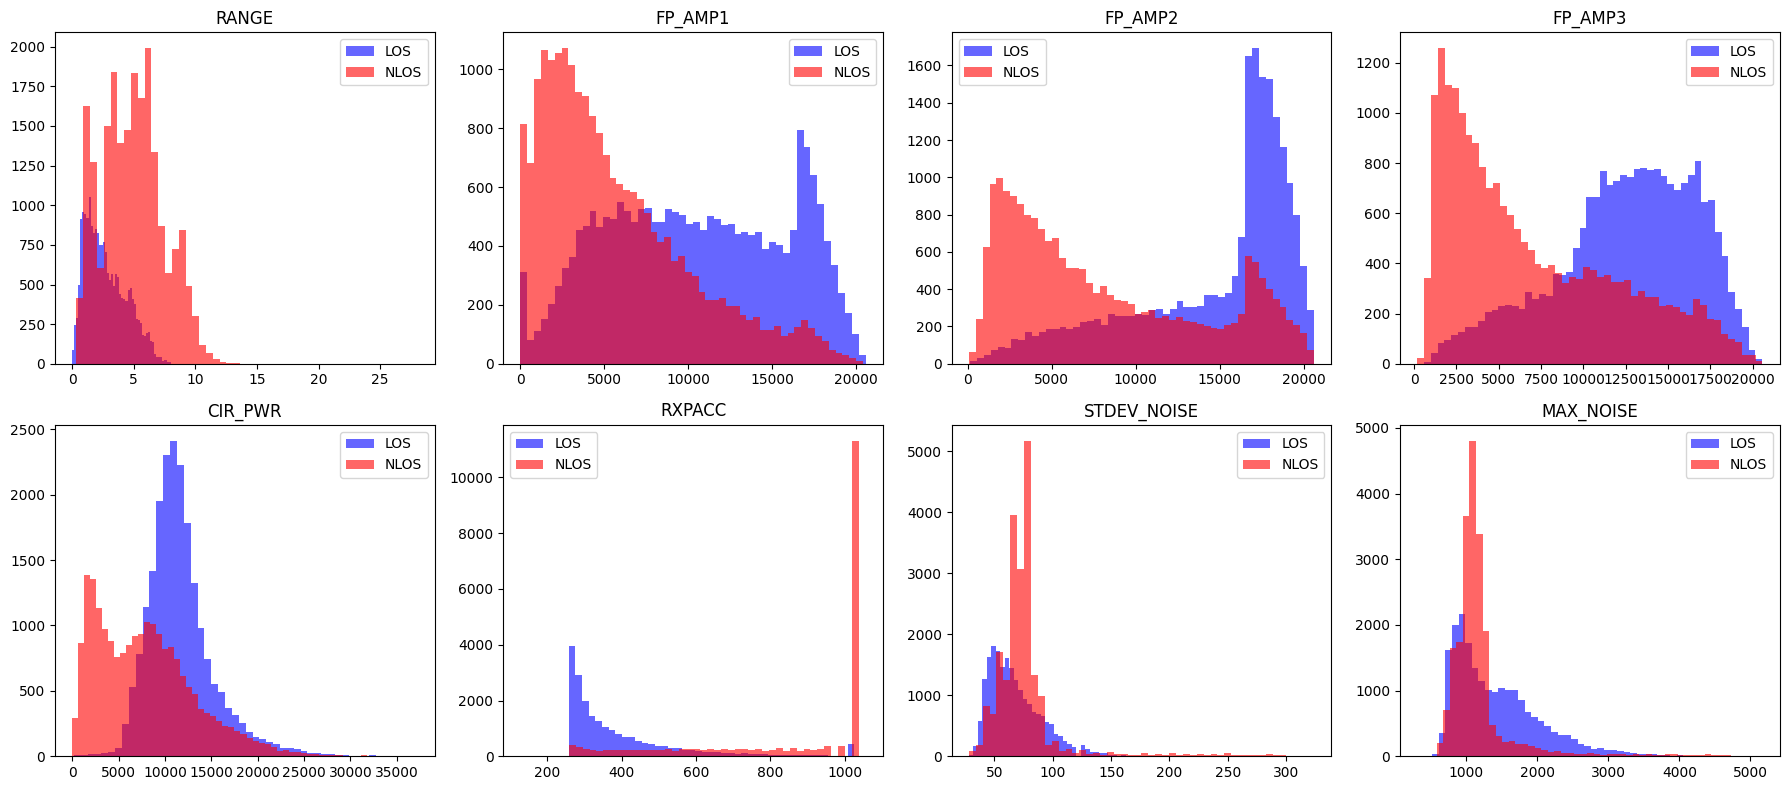

In [18]:
important_features = ['RANGE', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'CIR_PWR', 'RXPACC', 'STDEV_NOISE', 'MAX_NOISE']
# features FD_IDX TOO similar
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_features):
    axes[i].hist(df[df['NLOS']==0.0][col], bins=50, alpha=0.6, label='LOS', color='blue')
    axes[i].hist(df[df['NLOS']==1.0][col], bins=50, alpha=0.6, label='NLOS', color='red')
    axes[i].set_title(col)
    axes[i].legend()

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=150)
plt.show()

# to see overlap of the more important features, if feature cleanly seperate LOS from NLOS, very useful on its own

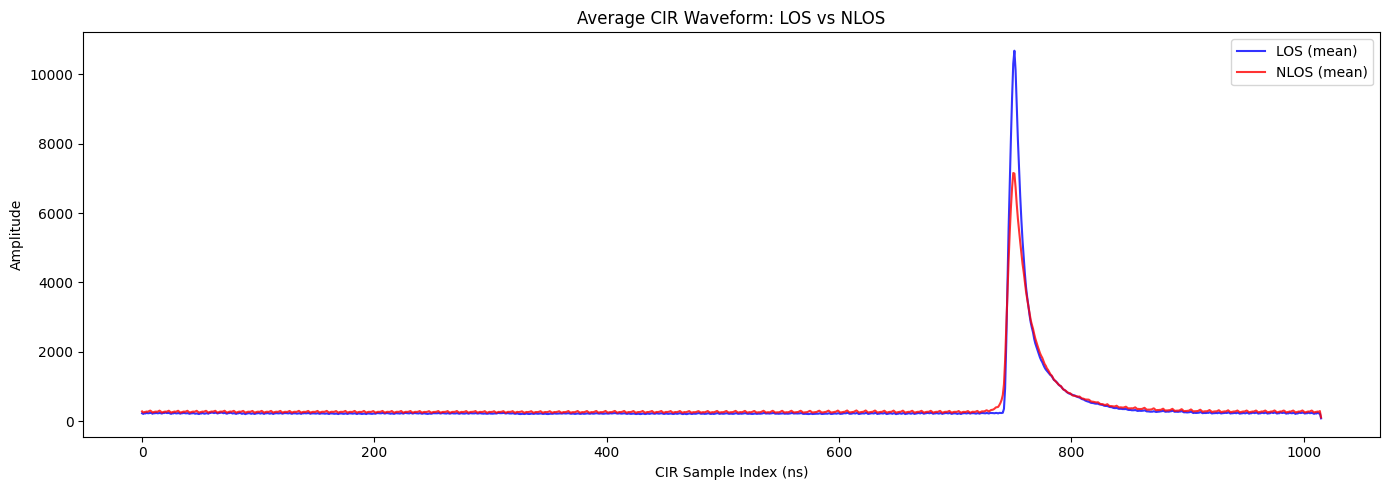

In [19]:
cir_cols = [f'CIR{i}' for i in range(1016)]

los_mean_cir = df[df['NLOS']==0.0][cir_cols].mean().values
nlos_mean_cir = df[df['NLOS']==1.0][cir_cols].mean().values

plt.figure(figsize=(14, 5))
plt.plot(los_mean_cir, label='LOS (mean)', color='blue', alpha=0.8)
plt.plot(nlos_mean_cir, label='NLOS (mean)', color='red', alpha=0.8)
plt.xlabel('CIR Sample Index (ns)')
plt.ylabel('Amplitude')
plt.title('Average CIR Waveform: LOS vs NLOS')
plt.legend()
plt.tight_layout()
plt.savefig('cir_waveform_comparison.png', dpi=150)
plt.show()

#average help to cancel out random noise and show true underlying pattern that distinguish LOS from NLOS at waveform lvl

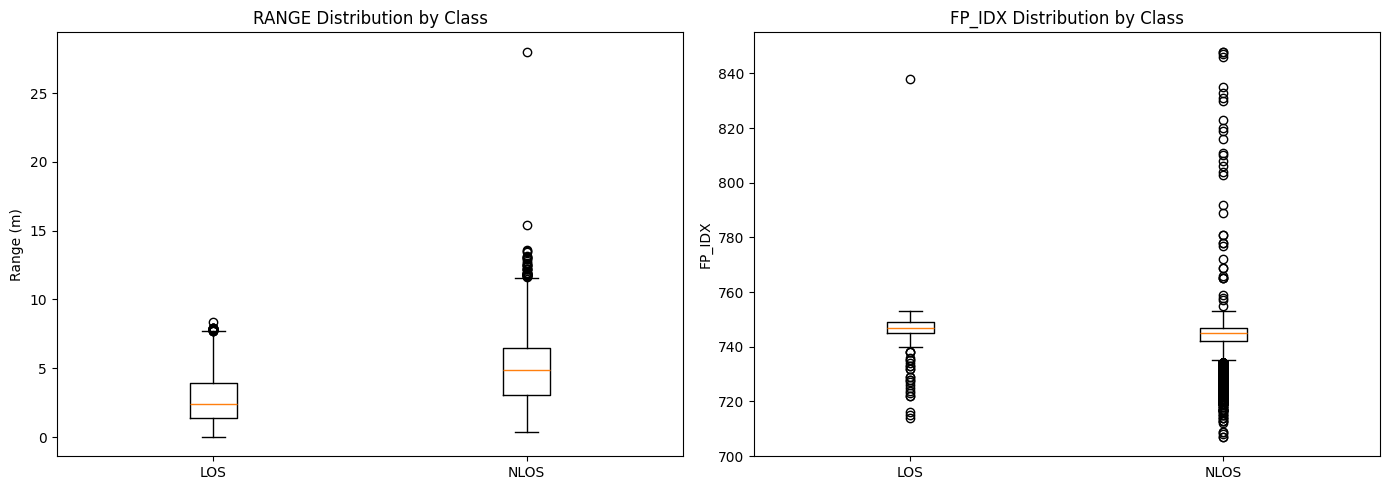

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RANGE
axes[0].boxplot([df[df['NLOS']==0.0]['RANGE'], df[df['NLOS']==1.0]['RANGE']], 
                tick_labels=['LOS', 'NLOS']) # Changed labels to tick_labels
axes[0].set_title('RANGE Distribution by Class')
axes[0].set_ylabel('Range (m)')

# FP_IDX
axes[1].boxplot([df[df['NLOS']==0.0]['FP_IDX'], df[df['NLOS']==1.0]['FP_IDX']], 
                tick_labels=['LOS', 'NLOS']) # Changed labels to tick_labels
axes[1].set_title('FP_IDX Distribution by Class')
axes[1].set_ylabel('FP_IDX')

plt.tight_layout()
plt.show()

#visualise the outliers (found earlier)

In [28]:
for col in ['RANGE', 'FP_IDX']:
    mean = df[col].mean()
    std = df[col].std()
    outliers = df[np.abs(df[col] - mean) > 3 * std]
    print(f"{col}: {len(outliers)} outliers beyond 3 std ({len(outliers)/len(df)*100:.2f}% of data)")
    print(f"  Mean: {mean:.2f}, Std: {std:.2f}, Threshold: >{mean + 3*std:.2f} or <{mean - 3*std:.2f}")
    print(f"  Outlier NLOS breakdown: {outliers['NLOS'].value_counts().to_dict()}\n")

RANGE: 114 outliers beyond 3 std (0.27% of data)
  Mean: 3.83, Std: 2.36, Threshold: >10.90 or <-3.24
  Outlier NLOS breakdown: {1.0: 114}

FP_IDX: 735 outliers beyond 3 std (1.75% of data)
  Mean: 745.65, Std: 4.51, Threshold: >759.17 or <732.14
  Outlier NLOS breakdown: {1.0: 718, 0.0: 17}



All outlier for RANGE belongs to NLOS (no LOS at all), this normal since it show LOS very accurate since just travel straight, NLOS signal bounce off walls, and travel longer path so extreme readings occur. 

FP_IDX has 718 NLOS and 17 LOS outliers. Values for NLOS show receiver maybe detect the waveform earlier or later in the waveform. LOS shows hardware maybe detect wrong?

Outliers: are tied to NLOS conditions, helps to identify NLOS

## Data cleaning implementation

### Drop 0 variance columns

In [22]:
drop_cols=['CH', 'BITRATE', 'PRFR']
df_cleaned = df.drop(columns=drop_cols)

In [23]:
print(f"Dropped columns: {drop_cols}")
print(f"Missing values: {df_cleaned.isnull().sum().sum()}")
print(f"Duplicate rows: {df_cleaned.duplicated().sum()}")
print(f"Shape: {df_cleaned.shape}")
print(f"Class distribution:\n{df_cleaned['NLOS'].value_counts()}")

Dropped columns: ['CH', 'BITRATE', 'PRFR']
Missing values: 0
Duplicate rows: 0
Shape: (42000, 1028)
Class distribution:
NLOS
0.0    21000
1.0    21000
Name: count, dtype: int64


In [24]:
#TO DECIDE WHAT TO DO WITH OUTLIER

# ── Version 1: Keep all outliers (
df_v1 = df_cleaned.copy()
print(f"V1 (keep all):  {df_v1.shape}")

# ── Version 2: Remove outlier rows ────────────────────────────────────────────
def get_outlier_mask(df, cols, n_std=3):
    mask = pd.Series([False] * len(df), index=df.index)
    for col in cols:
        mean, std = df[col].mean(), df[col].std()
        mask |= (np.abs(df[col] - mean) > n_std * std)
    return mask

outlier_mask = get_outlier_mask(df_cleaned, ['RANGE', 'FP_IDX'])
df_v2 = df_cleaned[~outlier_mask].reset_index(drop=True)
print(f"V2 (remove):    {df_v2.shape} — removed {outlier_mask.sum()} rows")

# ── Version 3: Cap outliers at 1st–99th percentile ────────────────────────────
df_v3 = df_cleaned.copy()
for col in ['RANGE', 'FP_IDX']:
    lower = df_v3[col].quantile(0.01)
    upper = df_v3[col].quantile(0.99)
    df_v3[col] = df_v3[col].clip(lower, upper)
    print(f"V3 cap {col}: clipped to [{lower:.2f}, {upper:.2f}]")
print(f"V3 (capped):    {df_v3.shape}")

V1 (keep all):  (42000, 1028)
V2 (remove):    (41198, 1028) — removed 802 rows
V3 cap RANGE: clipped to [0.40, 9.96]
V3 cap FP_IDX: clipped to [729.00, 751.00]
V3 (capped):    (42000, 1028)


In [25]:
print("=== V1 - Keep All ===")
print(df_v1[['RANGE', 'FP_IDX']].describe().loc[['min','max','mean']])

print("\n=== V2 - Remove Outliers ===")
print(df_v2[['RANGE', 'FP_IDX']].describe().loc[['min','max','mean']])

print("\n=== V3 - Capped ===")
print(df_v3[['RANGE', 'FP_IDX']].describe().loc[['min','max','mean']])

=== V1 - Keep All ===
          RANGE      FP_IDX
min    0.000000  707.000000
max   28.020000  848.000000
mean   3.831519  745.654167

=== V2 - Remove Outliers ===
          RANGE      FP_IDX
min    0.000000  733.000000
max   10.890000  759.000000
mean   3.766331  745.930749

=== V3 - Capped ===
         RANGE      FP_IDX
min   0.399900  729.000000
max   9.960100  751.000000
mean  3.825825  745.653381


In a UWB indoor environment, signals travel from anchor (transmitter) to tag (receiver). There are multiple paths the signal can take, arriving at different times. The shortest path always arrives first. 
Case 1:
Anchor ──────────────────► Tag    (Path 1: LOS, shortest, arrives first)
Anchor ──► Wall ──────────► Tag    (Path 2: NLOS, reflected, arrives second)
Path 1 = LOS (direct, shortest)
Path 2 = NLOS (reflected off something) ← always NLOS because the direct path was already Path 1

Case 2 — No LOS (fully blocked):
Anchor ──► Wall1 ─────────► Tag    (Path 1: NLOS, shortest reflected path)
Anchor ──► Wall2 ─────────► Tag    (Path 2: NLOS, longer reflected path)

Path 1 = NLOS (shortest reflected path)
Path 2 = NLOS (even longer reflected path) ← still NLOS

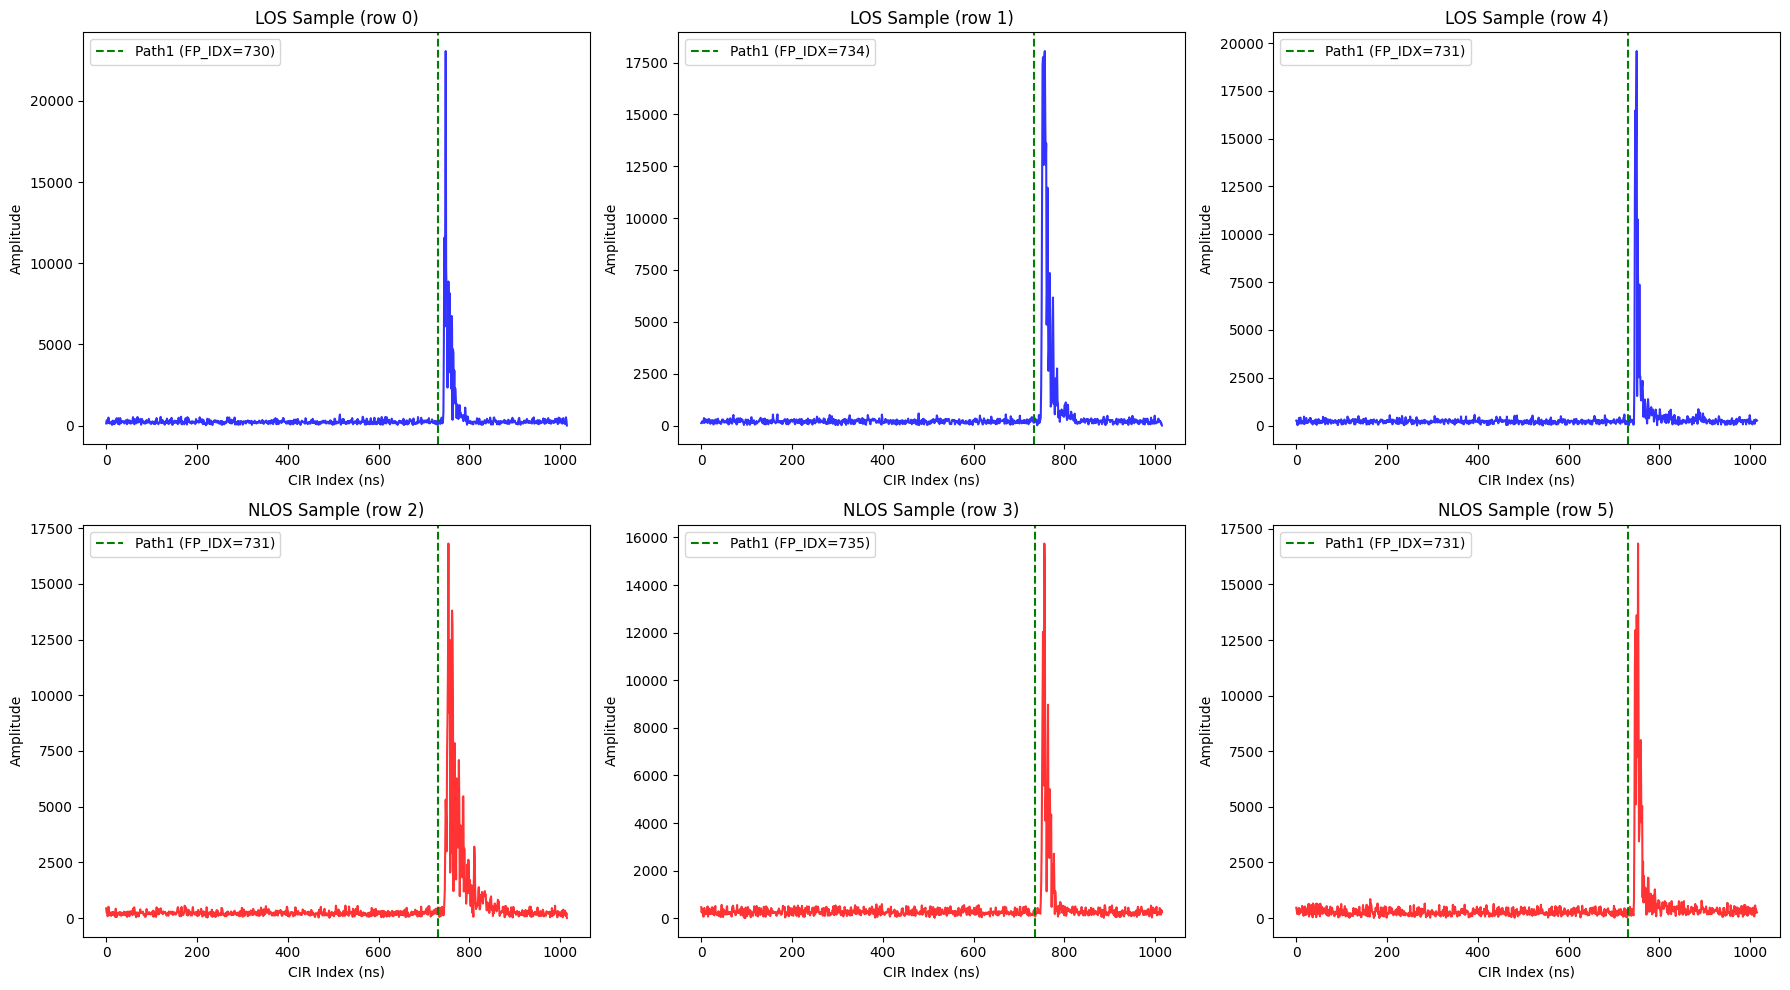

In [26]:
cir_cols = [f'CIR{i}' for i in range(1016)]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot 3 LOS and 3 NLOS samples
los_samples = df_cleaned[df_cleaned['NLOS']==0.0].iloc[:3]
nlos_samples = df_cleaned[df_cleaned['NLOS']==1.0].iloc[:3]
samples = pd.concat([los_samples, nlos_samples])

for i, (idx, row) in enumerate(samples.iterrows()):
    cir_values = row[cir_cols].values
    fp_idx = int(row['FP_IDX']) - 15  # PDF SAYS FP-IDX in dataset maps to CIR array position after minus 15 from it (should be because of hardware offset)
    
    axes[i].plot(cir_values, color='blue' if row['NLOS']==0 else 'red', alpha=0.8)
    axes[i].axvline(x=fp_idx, color='green', linestyle='--', label=f'Path1 (FP_IDX={fp_idx})') # green line marks 
    axes[i].set_title(f"{'LOS' if row['NLOS']==0 else 'NLOS'} Sample (row {idx})")
    axes[i].set_xlabel('CIR Index (ns)')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Extract CIR values

In [32]:
#method 1: Keep all CIR values (slow training)
#method 2: Trim to active window only
#method 3: Extract statistical features only (CURRENT)
#method 4: both trimmed CIR + Statistical features

cir_cols = [f'CIR{i}' for i in range(1016)]

def extract_cir_features(row):
    cir = row[cir_cols].values.astype(float)
    fp_pos = int(row['FP_IDX']) - 15  # CIR array index of Path 1 (PDF: FP_IDX - 15)
    fp_pos = max(0, min(fp_pos, 1015))  # clamp within bounds

    peak_amp   = np.max(cir)                        # highest amplitude in waveform (capture signal strength)
    peak_idx   = np.argmax(cir)                     # where that peak occurs 
    cir_kurt   = kurtosis(cir)                      # sharpness: LOS=high, NLOS=low (how sharp/pointed)
    cir_skew   = skew(cir)                          # asymmetry of waveform 
    energy_total = np.sum(cir ** 2)                 # total signal energy

    # Energy before vs after peak: LOS drops off cleanly, NLOS stays elevated
    energy_before = np.sum(cir[:peak_idx] ** 2) if peak_idx > 0 else 0
    energy_after  = np.sum(cir[peak_idx+1:] ** 2) if peak_idx < 1015 else 0
    energy_ratio  = energy_before / (energy_after + 1e-9)  # avoid div by zero

    # Rise time: samples from noise floor to peak (how sharply signal builds up)
    noise_floor  = np.mean(cir[:fp_pos]) if fp_pos > 0 else np.mean(cir[:10])
    threshold    = noise_floor + 0.1 * (peak_amp - noise_floor)
    rise_indices = np.where(cir[:peak_idx+1] >= threshold)[0]
    rise_time    = (peak_idx - rise_indices[0]) if len(rise_indices) > 0 else peak_idx #LOS rise sharply, NLOS more gradual

    return pd.Series({
        'CIR_PEAK_AMP'    : peak_amp,
        'CIR_PEAK_IDX'    : peak_idx,
        'CIR_KURTOSIS'    : cir_kurt,
        'CIR_SKEWNESS'    : cir_skew,
        'CIR_ENERGY_TOTAL': energy_total,
        'CIR_ENERGY_RATIO': energy_ratio,
        'CIR_RISE_TIME'   : rise_time,
    })

print("Extracting CIR statistical features... (this may take a moment)")
cir_features = df_v1.apply(extract_cir_features, axis=1)
print(f"Done. Extracted {cir_features.shape[1]} features for {cir_features.shape[0]} rows")
print(cir_features.head())


Extracting CIR statistical features... (this may take a moment)
Done. Extracted 7 features for 42000 rows
   CIR_PEAK_AMP  CIR_PEAK_IDX  CIR_KURTOSIS  CIR_SKEWNESS  CIR_ENERGY_TOTAL  \
0       23077.0         748.0    144.958572     10.545582      1.685005e+09   
1       18059.0         757.0     77.034432      8.510976      2.905349e+09   
2       16809.0         754.0     58.383480      7.090688      2.144610e+09   
3       15742.0         756.0    105.653200      9.471998      1.287028e+09   
4       19583.0         750.0    151.456101     11.772332      1.594674e+09   

   CIR_ENERGY_RATIO  CIR_RISE_TIME  
0          0.554437            4.0  
1          1.512661            7.0  
2          0.251327            7.0  
3          0.740946            6.0  
4          2.686055            5.0  


In [33]:
# Compare mean of each new feature per class
temp = pd.concat([df_v1['NLOS'], cir_features], axis=1)
print(temp.groupby('NLOS')[cir_features.columns.tolist()].mean().T.rename(columns={0.0:'LOS mean', 1.0:'NLOS mean'}))

#Big difference means feature is useful

NLOS                  LOS mean     NLOS mean
CIR_PEAK_AMP      1.835967e+04  1.325318e+04
CIR_PEAK_IDX      7.504549e+02  7.512978e+02
CIR_KURTOSIS      1.284810e+02  9.467205e+01
CIR_SKEWNESS      1.040249e+01  8.629071e+00
CIR_ENERGY_TOTAL  1.685821e+09  1.199259e+09
CIR_ENERGY_RATIO  7.563989e-01  8.949405e-01
CIR_RISE_TIME     4.075857e+00  2.609214e+01


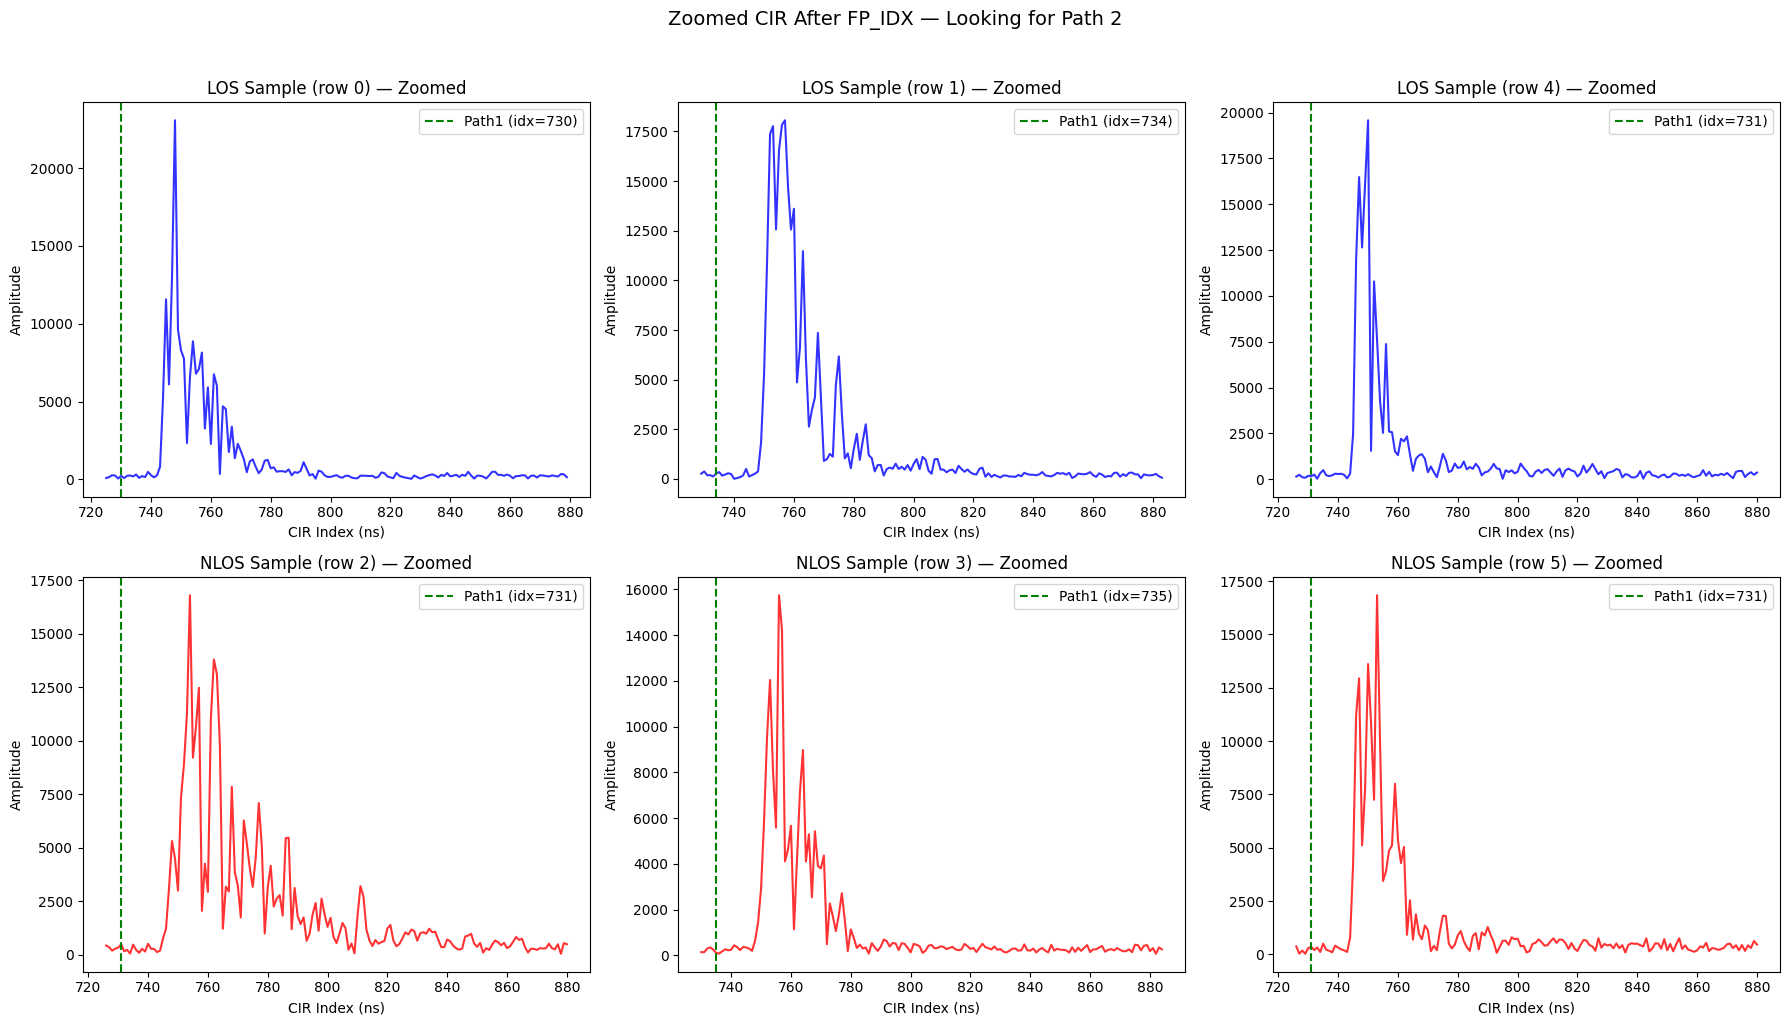

Saved: cir_zoomed_path2.png


In [35]:
# Zoom in to see what happen after the first path arrive, so can find path 2 is hiding

cir_cols = [f'CIR{i}' for i in range(1016)]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

los_samples  = df_v1[df_v1['NLOS']==0.0].iloc[:3]
nlos_samples = df_v1[df_v1['NLOS']==1.0].iloc[:3]
samples = pd.concat([los_samples, nlos_samples])

for i, (idx, row) in enumerate(samples.iterrows()):
    cir    = row[cir_cols].values
    fp_pos = int(row['FP_IDX']) - 15  # Path 1 CIR index

    # Zoom window: fp_pos - 5 to fp_pos+150 to cut away noise before the signal
    zoom_start = max(0, fp_pos - 5)
    zoom_end   = min(1015, fp_pos + 150)
    zoom_cir   = cir[zoom_start:zoom_end]
    x_axis     = np.arange(zoom_start, zoom_end)

    color = 'blue' if row['NLOS']==0 else 'red'
    axes[i].plot(x_axis, zoom_cir, color=color, alpha=0.8)
    axes[i].axvline(x=fp_pos, color='green', linestyle='--', label=f'Path1 (idx={fp_pos})')
    axes[i].set_title(f"{'LOS' if row['NLOS']==0 else 'NLOS'} Sample (row {idx}) — Zoomed")
    axes[i].set_xlabel('CIR Index (ns)')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend()

plt.suptitle('Zoomed CIR After FP_IDX — Looking for Path 2', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('cir_zoomed_path2.png', dpi=150)
plt.show()
print("Saved: cir_zoomed_path2.png")


## Path 2 Detection: Search for second dominant peak in CIR waveform after path 1

In [36]:
# search boundaries, just need search a window after path 1
SEARCH_START = 10   
SEARCH_END   = 100 

def detect_path2(row):
    cir    = row[cir_cols].values.astype(float)
    fp_pos = int(row['FP_IDX']) - 15
    fp_pos = max(0, min(fp_pos, 1015))

    # Noise threshhold using the first 50 CIR sample (where nothing happen)
    noise_floor = np.mean(cir[:50])
    noise_std   = np.std(cir[:50])
    threshold   = noise_floor + 3 * noise_std  # 3-sigma above noise = real signal

    # Search window boundaries
    search_start = min(fp_pos + SEARCH_START, 1015)
    search_end   = min(fp_pos + SEARCH_END,   1015)

    if search_start >= search_end:
        return pd.Series({'PATH2_CIR_IDX': np.nan, 'PATH2_AMP': np.nan})

    window = cir[search_start:search_end]

    # Find local maxima in window above threshold (5 samples apart so do not detect same peak)
    peaks, props = find_peaks(window, height=threshold, distance=5)

    #2 outcomes:
    if len(peaks) == 0:
        # No clear peak found (OR RETURN NULL, since nothing cleared the minimum threshold, so highest peak gonna be 1 of the noise peak)
        local_max_idx = np.argmax(window)
        path2_idx = search_start + local_max_idx
        path2_amp = window[local_max_idx]
    else:
        # Take the tallest peak in the search window
        tallest = peaks[np.argmax(props['peak_heights'])]
        path2_idx = search_start + tallest
        path2_amp = cir[path2_idx]

    return pd.Series({'PATH2_CIR_IDX': path2_idx, 'PATH2_AMP': path2_amp})

print("Detecting Path 2 peaks...")
path2_results = df_v1.apply(detect_path2, axis=1)
print(f"Done.")
print(path2_results.describe())


Detecting Path 2 peaks...
Done.
       PATH2_CIR_IDX     PATH2_AMP
count   42000.000000  42000.000000
mean      750.872476  15806.414476
std         5.059490   4584.818246
min       716.000000    409.000000
25%       748.000000  14007.750000
50%       750.000000  16993.500000
75%       753.000000  18639.000000
max       858.000000  23501.000000


In [38]:
#estimate path 2 range

SPEED_OF_LIGHT = 0.2998  # metres per nanosecond (c in m/ns)

# Path 1 CIR index
path1_cir_idx = (df_v1['FP_IDX'] - 15).clip(0, 1015)

# Extra distance Path 2 travels vs Path 1
extra_ns    = path2_results['PATH2_CIR_IDX'] - path1_cir_idx
extra_dist  = extra_ns * SPEED_OF_LIGHT  # convert nanoseconds to metres

# Path 2 estimated range
path2_range = df_v1['RANGE'] + extra_dist

#issue is that maybe if its LOS (accurate) still ok but if NLOS (inaccurate) + another extra travel time (even more inaccurate)
print("Path 2 Range statistics:")
print(path2_range.describe())
print(f"\nMean extra distance Path 2 travels: {extra_dist.mean():.3f} m")


Path 2 Range statistics:
count    42000.000000
mean         9.892968
std          3.275096
min          4.846800
25%          7.326800
50%          9.346200
75%         11.525200
max         35.814800
dtype: float64

Mean extra distance Path 2 travels: 6.061 m


## Combine the non CIR features with the CIR features

In [39]:
#2 path labels and final dataset

# Identify non-CIR feature columns
feature_cols_clean = [c for c in df_v1.columns if not c.startswith('CIR') and c != 'NLOS']

# Build final engineered dataset
df_engineered = df_v1[feature_cols_clean].copy()

# Two-path labels
df_engineered['PATH1_LABEL'] = df_v1['NLOS'].astype(int)   # 0=LOS, 1=NLOS
df_engineered['PATH2_LABEL'] = 1 # always NLOS

# Path indices and amplitudes
df_engineered['PATH1_CIR_IDX'] = path1_cir_idx.values
df_engineered['PATH2_CIR_IDX'] = path2_results['PATH2_CIR_IDX'].values
df_engineered['PATH2_AMP']     = path2_results['PATH2_AMP'].values

# Path ranges
df_engineered['PATH1_RANGE']   = df_v1['RANGE'].values
df_engineered['PATH2_RANGE']   = path2_range.values

# CIR statistical features
df_engineered = pd.concat([df_engineered, cir_features], axis=1)

print(f"Final engineered dataset shape: {df_engineered.shape}")
print(f"\nColumns: {df_engineered.columns.tolist()}")
print(f"\nMissing values: {df_engineered.isnull().sum().sum()}")
print(f"\nPath 1 label distribution:\n{df_engineered['PATH1_LABEL'].value_counts()}")
print(f"\nPath 2 label distribution:\n{df_engineered['PATH2_LABEL'].value_counts()}")


Final engineered dataset shape: (42000, 24)

Columns: ['RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'STDEV_NOISE', 'MAX_NOISE', 'RXPACC', 'FRAME_LEN', 'PREAM_LEN', 'PATH1_LABEL', 'PATH2_LABEL', 'PATH1_CIR_IDX', 'PATH2_CIR_IDX', 'PATH2_AMP', 'PATH1_RANGE', 'PATH2_RANGE', 'CIR_PEAK_AMP', 'CIR_PEAK_IDX', 'CIR_KURTOSIS', 'CIR_SKEWNESS', 'CIR_ENERGY_TOTAL', 'CIR_ENERGY_RATIO', 'CIR_RISE_TIME']

Missing values: 0

Path 1 label distribution:
PATH1_LABEL
0    21000
1    21000
Name: count, dtype: int64

Path 2 label distribution:
PATH2_LABEL
1    42000
Name: count, dtype: int64


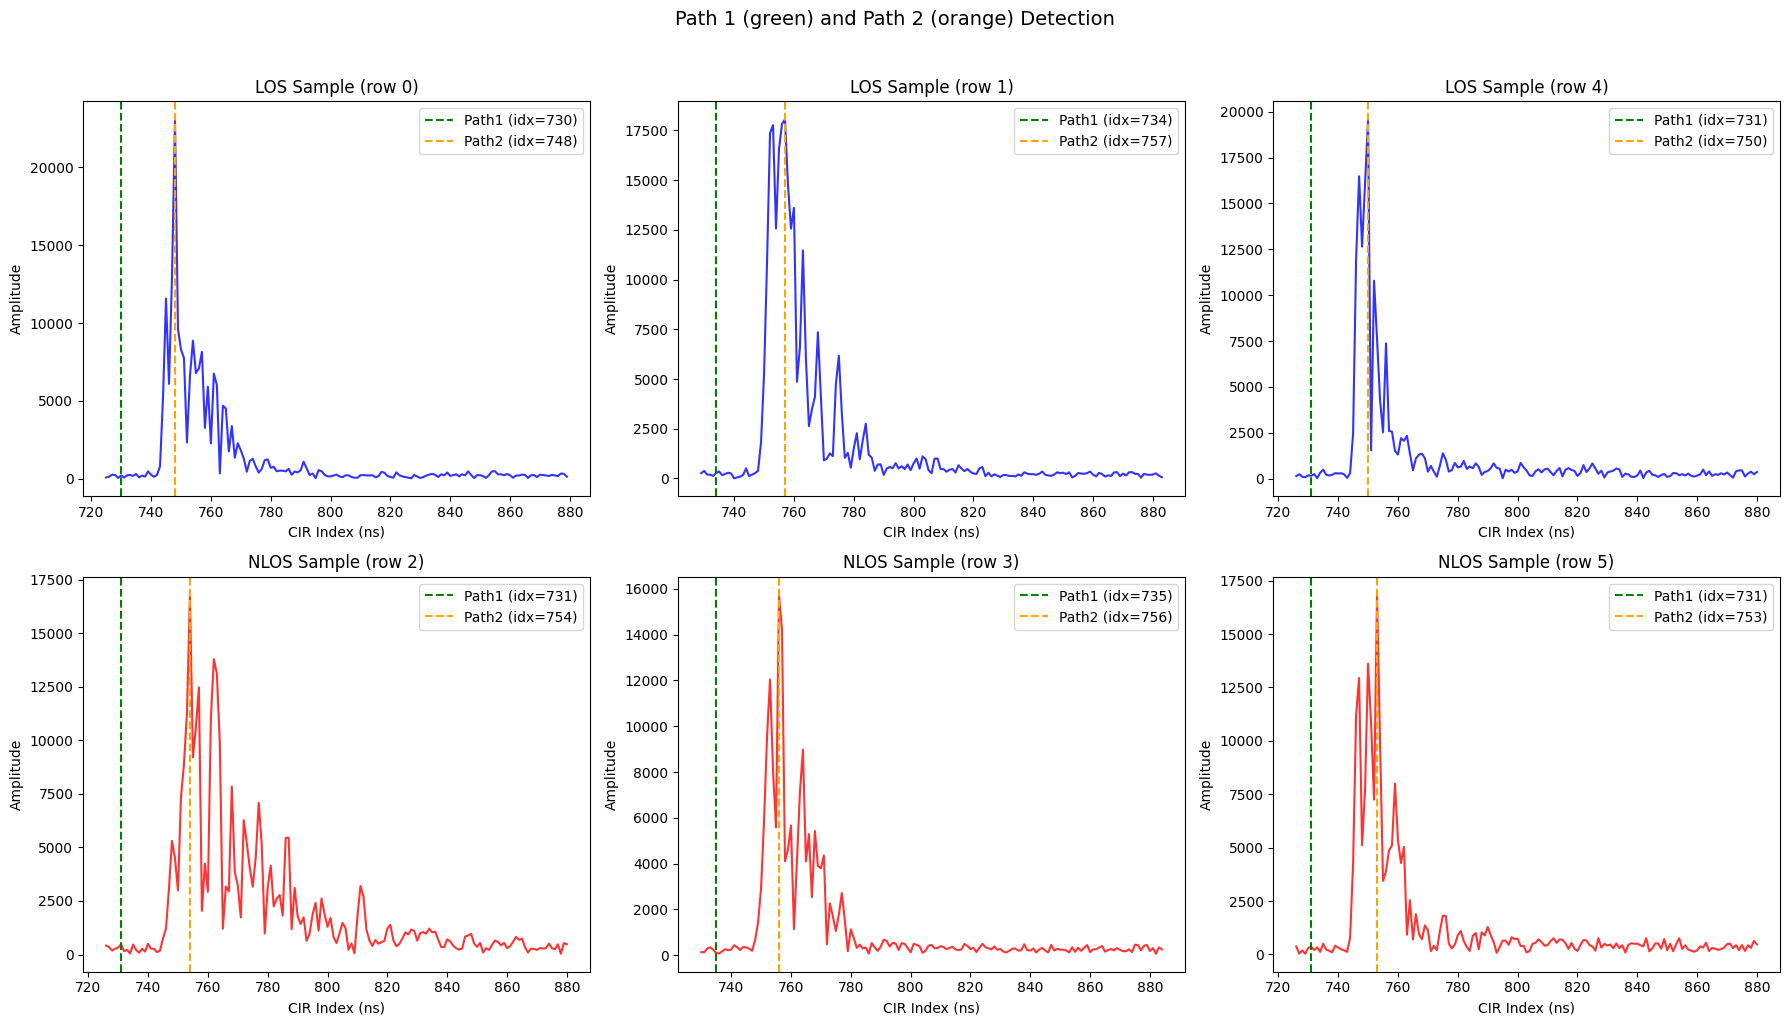

Saved: path2_detection.png


In [40]:
# Visualise path 2 detection result

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

los_samples  = df_engineered[df_engineered['PATH1_LABEL']==0].iloc[:3]
nlos_samples = df_engineered[df_engineered['PATH1_LABEL']==1].iloc[:3]
samples_eng  = pd.concat([los_samples, nlos_samples])

for i, (idx, row) in enumerate(samples_eng.iterrows()):
    cir_row  = df_v1.loc[idx, cir_cols].values
    fp_pos   = int(row['PATH1_CIR_IDX'])
    p2_pos   = int(row['PATH2_CIR_IDX']) if not np.isnan(row['PATH2_CIR_IDX']) else None

    zoom_start = max(0, fp_pos - 5)
    zoom_end   = min(1015, fp_pos + 150)
    x_axis     = np.arange(zoom_start, zoom_end)

    color = 'blue' if row['PATH1_LABEL']==0 else 'red'
    axes[i].plot(x_axis, cir_row[zoom_start:zoom_end], color=color, alpha=0.8)
    axes[i].axvline(x=fp_pos, color='green',  linestyle='--', label=f'Path1 (idx={fp_pos})')
    if p2_pos:
        axes[i].axvline(x=p2_pos, color='orange', linestyle='--', label=f'Path2 (idx={p2_pos})')
    axes[i].set_title(f"{'LOS' if row['PATH1_LABEL']==0 else 'NLOS'} Sample (row {idx})")
    axes[i].set_xlabel('CIR Index (ns)')
    axes[i].set_ylabel('Amplitude')
    axes[i].legend()

plt.suptitle('Path 1 (green) and Path 2 (orange) Detection', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('path2_detection.png', dpi=150)
plt.show()
print("Saved: path2_detection.png")


## Next step: Dimension decision, Feature scaling (StandardScaler?), feature importance, test/train split